## HIPOTESIS

1. **Sharks attacks men more often**
2. **The probability of been a fatal Shark attack, is higher on women**
3. **Have been reported more shark attacks with people between the ages of 15 and 35.**
4. **The most common injury was to the leg**
5. **The most common shark attacks reported were by white sharks**
6. **They are more Sharks attacks during summer**
7. **Sharks more frequently attack people that are sufing**
8. **The percentage of deaths is higher in people that is diving than in people who practice surfing**

In [1]:
import pandas as pd
import src.limpieza_texto as lt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
shark = pd.read_csv("data/sharklimpio.csv")

In [113]:
shark.columns

Index(['COUNTRY', 'YEAR', 'MONTHLY', 'N_TIME', 'SEX', 'AGE', 'N_ACTIVITY',
       'N_SPECIES', 'FATAL_Y_N', 'N_INJURY'],
      dtype='object')

In [109]:
shark.COUNTRY.value_counts

<bound method IndexOpsMixin.value_counts of 0                      USA
1                      USA
2                      USA
3                AUSTRALIA
4                   MEXICO
               ...        
6297             AUSTRALIA
6298             AUSTRALIA
6299                   USA
6300                PANAMA
6301    CEYLON (SRI LANKA)
Name: COUNTRY, Length: 6302, dtype: object>

In [124]:
shark["N_INJURY"].loc[(shark["N_INJURY"] != '0')].value_counts

<bound method IndexOpsMixin.value_counts of 2        leg
3        leg
4        leg
7       foot
8        leg
        ... 
6281     leg
6284    foot
6288     leg
6290     leg
6291    foot
Name: N_INJURY, Length: 2321, dtype: object>

### **H1 - Sharks attacks men more often**

In [4]:
shark['SEX'] = shark['SEX'].replace(['M', 'F'], ['MALE', 'FEMALE'])

In [5]:
shark["SEX"].unique()

array(['FEMALE', 'MALE', '0'], dtype=object)

In [6]:
shark["SEX"].value_counts()

MALE      5096
FEMALE     637
0          569
Name: SEX, dtype: int64

In [7]:
## ax = sns.countplot(x=shark["SEX"].loc[(shark["SEX"] != '0')], palette="Blues", order = shark["SEX"].loc[(shark["SEX"] != '0')].value_counts().index).set_title('MALE vs FEMALE')

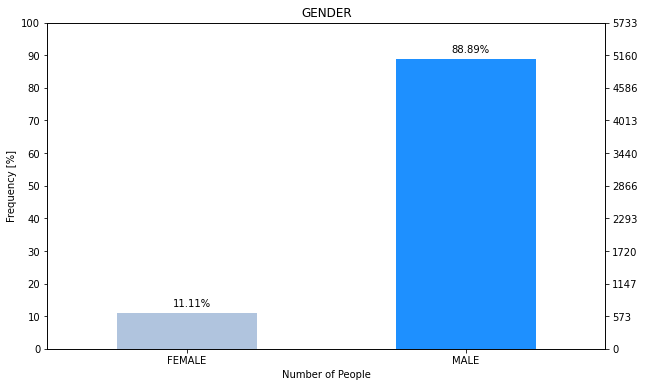

In [8]:
plt.figure(figsize=(10,6))
plt.title('GENDER')
plt.xlabel('Number of People')
plt.ylabel('Frequency [%]')

ax = (shark["SEX"].loc[(shark["SEX"] != '0')].value_counts()/len(shark["SEX"].loc[(shark["SEX"] != '0')])*100).sort_index().plot(kind="bar", rot=0, color=['lightsteelblue', 'dodgerblue'])
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(shark["SEX"].loc[(shark["SEX"] != '0')])/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+2))

In [12]:
ax.figure.savefig("GENDER.svg")

<AxesSubplot:>

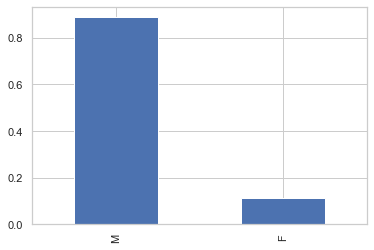

In [25]:
shark["SEX"].value_counts(normalize= True).plot(kind='bar', alpha=1, label=True)

### **H2 - The probability of been a fatal Shark attack, is higher on women**

In [9]:
shark["FATAL_Y_N"].value_counts()

N    4301
Y    1388
0     613
Name: FATAL_Y_N, dtype: int64

In [10]:
filtrado = shark.loc[(shark["SEX"] != '0') & (shark["FATAL_Y_N"] != '0') , ["SEX", "FATAL_Y_N"]]
filtrado.value_counts()

SEX     FATAL_Y_N
MALE    N            3482
        Y            1172
FEMALE  N             468
        Y             107
dtype: int64

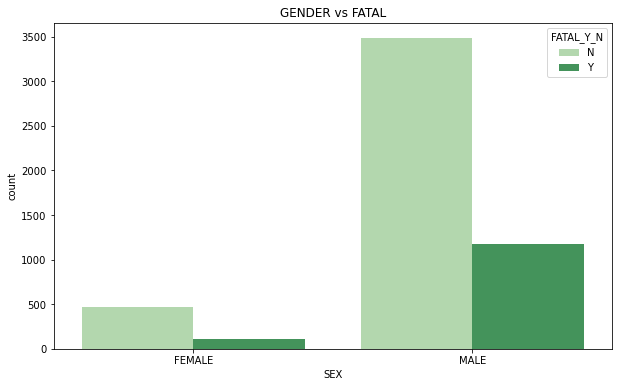

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax1 = sns.countplot(x='SEX', hue='FATAL_Y_N', data=filtrado, palette="Greens").set_title('GENDER vs FATAL')

In [16]:
ax1.figure.savefig("GENDER vs Mortal.svg")

### **H3 - Have been reported more shark attacks with people between the ages of 15 and 35.**

In [12]:
shark["AGE"].value_counts()

0     2894
17     154
18     152
19     144
20     143
      ... 
72       1
84       1
67       1
81       1
87       1
Name: AGE, Length: 81, dtype: int64

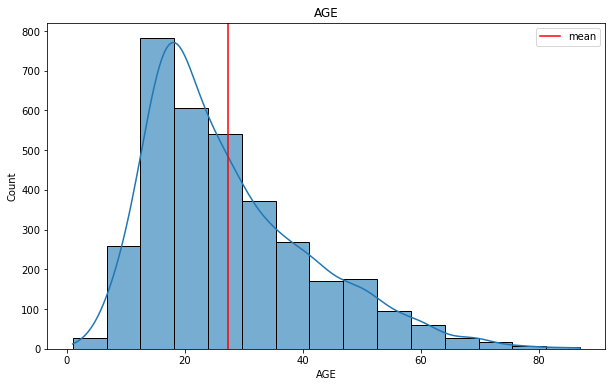

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('AGE')
plot = sns.histplot(x=shark.AGE.loc[(shark["AGE"] != 0)], bins=15, kde=True, alpha=0.6)
plot.axvline(x=shark.AGE.loc[(shark["AGE"] != 0)].mean(), c="red", label="mean")
plt.legend()

In [14]:
plot.figure.savefig("AGE.svg")

### **H4 - The most common injury was to the leg**

In [15]:
shark['N_INJURY'].value_counts()

0       3981
leg      809
foot     725
hand     382
arm      362
head      43
Name: N_INJURY, dtype: int64

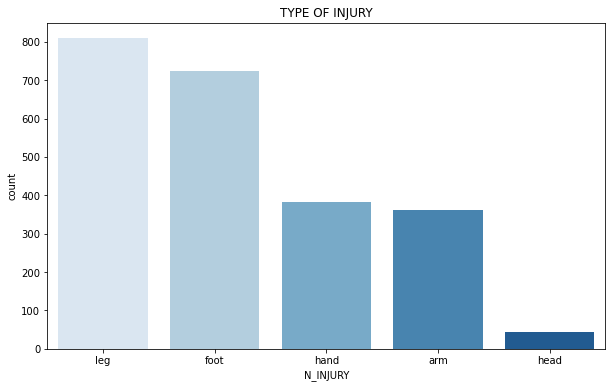

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
ax3 = sns.countplot(x=shark["N_INJURY"].loc[(shark["N_INJURY"] != '0')], palette="Blues", ax=ax, order = shark['N_INJURY'].loc[(shark["N_INJURY"] != '0')].value_counts().index).set_title('TYPE OF INJURY')

In [36]:
ax3.figure.savefig("TYPE_OF_INJURY1.svg")

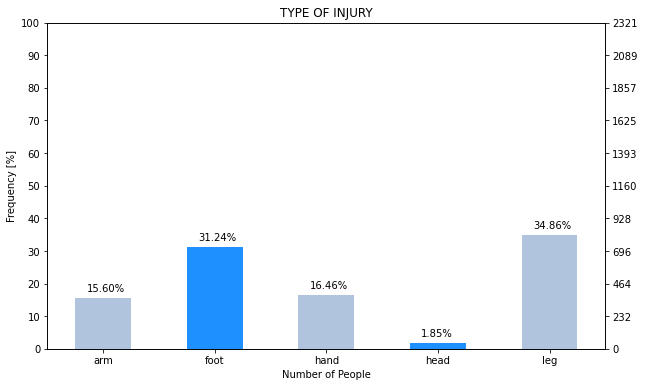

In [46]:
plt.figure(figsize=(10,6))
plt.title('TYPE OF INJURY')
plt.xlabel('Number of People')
plt.ylabel('Frequency [%]')

ax = (shark["N_INJURY"].loc[(shark["N_INJURY"] != '0')].value_counts()/len(shark["N_INJURY"].loc[(shark["N_INJURY"] != '0')])*100).sort_index().plot(kind="bar", rot=0, color=['lightsteelblue', 'dodgerblue'])
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(shark["N_INJURY"].loc[(shark["N_INJURY"] != '0')])/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))

In [47]:
ax.figure.savefig("TYPE_OF_INJURY2.svg")

### **H5 - The most common shark attacks reported were by white sharks**

In [39]:
shark['N_SPECIES'].value_counts()

0            4866
White         638
Tiger         256
Bull          184
Blacktip      101
Nurse          97
Blue           56
Reef           55
Wobbegong      49
Name: N_SPECIES, dtype: int64

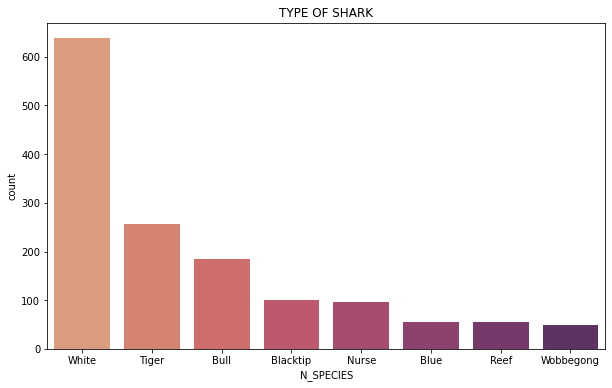

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
ax4 = sns.countplot(x=shark["N_SPECIES"].loc[(shark["N_SPECIES"] != '0')], palette='flare', ax=ax, order = shark['N_SPECIES'].loc[(shark["N_SPECIES"] != '0')].value_counts().index).set_title('TYPE OF SHARK')

In [51]:
ax4.figure.savefig("TYPE_OF_SHARK1.svg")

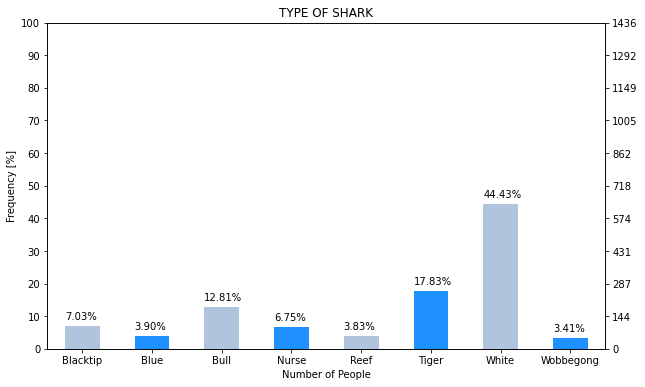

In [97]:
plt.figure(figsize=(10,6))
plt.title('TYPE OF SHARK')
plt.xlabel('Number of People')
plt.ylabel('Frequency [%]')

ax = (shark["N_SPECIES"].loc[(shark["N_SPECIES"] != '0')].value_counts()/len(shark["N_SPECIES"].loc[(shark["N_SPECIES"] != '0')])*100).sort_index().plot(kind="bar", rot=0, color=['lightsteelblue', 'dodgerblue'])
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(shark["N_SPECIES"].loc[(shark["N_SPECIES"] != '0')])/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0, p.get_height()+2))

In [98]:
ax.figure.savefig("TYPE_OF_SHARK2.svg")

### **H6 - They are more Sharks attacks during summer (I just realized that the same day of the year in one place could be summer and in another winter...because it depends on the hemisphere... )**

In [23]:
shark["MONTHLY"] = shark["MONTHLY"].replace('0', None)

In [79]:
shark['MONTHLY'].value_counts()

jul    662
aug    598
sep    552
0      552
jan    518
jun    494
apr    453
oct    442
dec    436
mar    412
nov    406
may    396
feb    381
Name: MONTHLY, dtype: int64

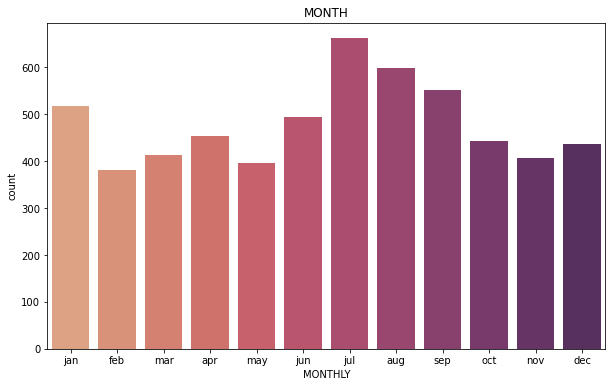

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
ax5 = sns.countplot(x=shark.MONTHLY, palette="flare", order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']).set_title('MONTH')

In [54]:
ax5.figure.savefig("MONTLHY.svg")

### **H7 - Sharks attacks more often to people that are surfing**

In [56]:
shark['N_ACTIVITY'].value_counts().head(5)

0           1981
swimming    1106
surfing     1094
fishing      725
diving       531
Name: N_ACTIVITY, dtype: int64

In [58]:
shark_activity = shark['N_ACTIVITY'].loc[(shark["N_ACTIVITY"] == 'swimming') | (shark["N_ACTIVITY"] == 'surfing') | (shark["N_ACTIVITY"] == 'fishing') | (shark["N_ACTIVITY"] == 'diving')]
shark_activity

2        surfing
3        surfing
4         diving
5        surfing
6       swimming
          ...   
6296    swimming
6297      diving
6298      diving
6299    swimming
6301    swimming
Name: N_ACTIVITY, Length: 3456, dtype: object

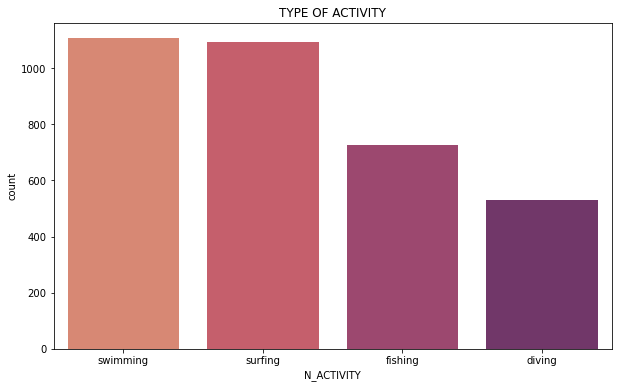

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
ax6 = sns.countplot(x=shark_activity, palette='flare', ax=ax, order = shark_activity.value_counts().index).set_title('TYPE OF ACTIVITY')

In [64]:
ax6.figure.savefig("TYPE_OF_ACTIVITY1.svg")

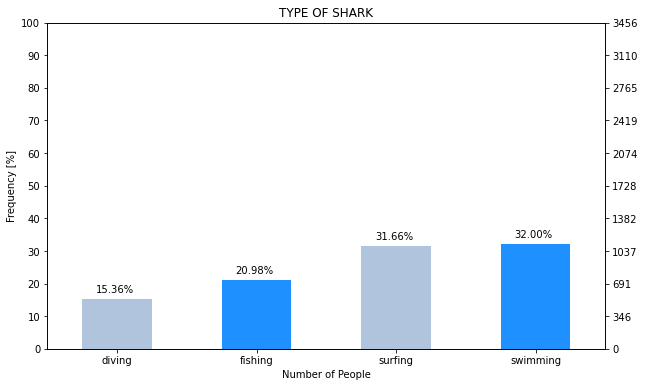

In [65]:
plt.figure(figsize=(10,6))
plt.title('TYPE OF SHARK')
plt.xlabel('Number of People')
plt.ylabel('Frequency [%]')

ax = (shark_activity.value_counts()/len(shark_activity)*100).sort_index().plot(kind="bar", rot=0, color=['lightsteelblue', 'dodgerblue'])
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(shark_activity)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))

In [66]:
ax.figure.savefig("TYPE_OF_ACTIVITY2.svg")

### **H8 - The percentage of deaths is higher in people that is diving than in people who practice surfing**

In [ ]:
filtrado = shark.loc[(shark["SEX"] != '0') & (shark["FATAL_Y_N"] != '0') , ["SEX", "FATAL_Y_N"]]
filtrado.value_counts()

In [93]:
filtrado = shark.loc[(shark["N_ACTIVITY"] == 'swimming') & (shark["FATAL_Y_N"] != '0') | (shark["N_ACTIVITY"] == 'surfing') & (shark["FATAL_Y_N"] != '0')  | (shark["N_ACTIVITY"] == 'fishing') & (shark["FATAL_Y_N"] != '0') | (shark["N_ACTIVITY"] == 'diving') & (shark["FATAL_Y_N"] != '0') , ["N_ACTIVITY", "FATAL_Y_N"]]
filtrado.value_counts()

N_ACTIVITY  FATAL_Y_N
surfing     N            986
swimming    N            583
fishing     N            583
swimming    Y            411
diving      N            348
            Y            121
fishing     Y            101
surfing     Y             60
dtype: int64

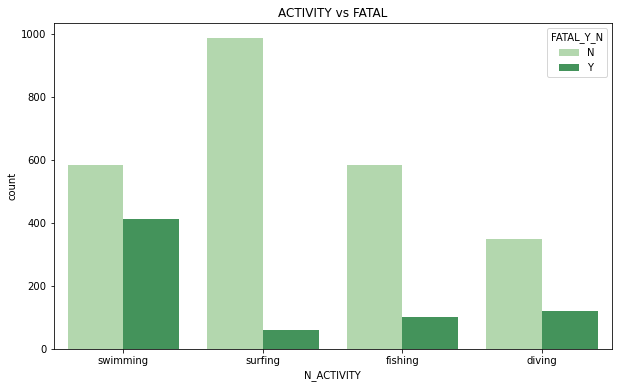

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
ax7 = sns.countplot(x="N_ACTIVITY", hue="FATAL_Y_N", data=filtrado, palette="Greens", order = shark_activity.value_counts().index).set_title('ACTIVITY vs FATAL')

In [96]:
ax7.figure.savefig("ACTIVITYvsFATAL.svg")